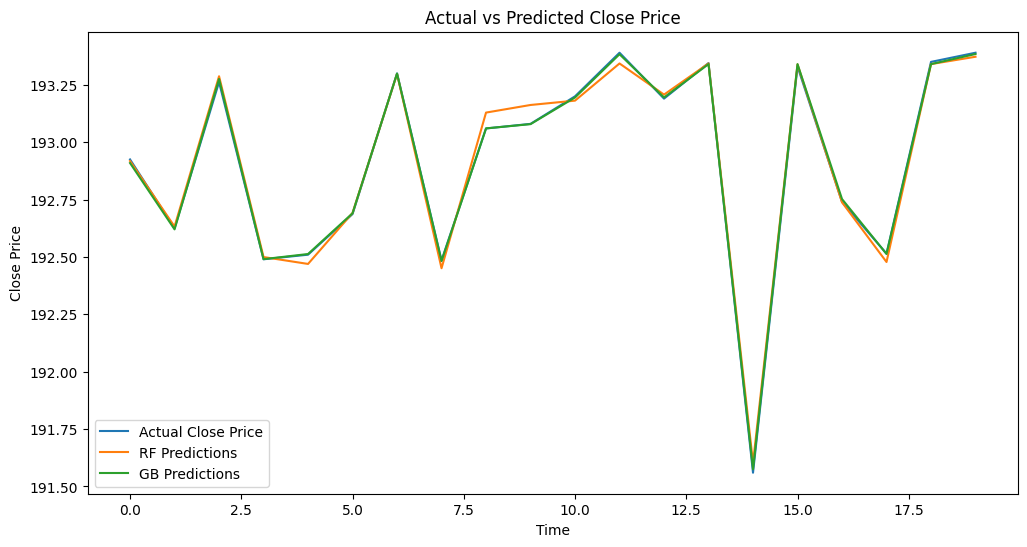

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Load the dataset
url = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo&datatype=csv"
data = pd.read_csv(url)

# Extracting features and target variable
X = data[['open', 'high', 'low', 'close']]
y = data['close']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Creating and training Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Making predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Close Price')
plt.plot(rf_predictions, label='RF Predictions')
plt.plot(gb_predictions, label='GB Predictions')
plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()